Importing the necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

Read the Dataset

In [ ]:
data = pd.read_excel('Data_Train.xlsx')

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
data.shape

(10683, 11)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
data['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
35h 35m      1
41h 20m      1
35h 20m      1
28h 30m      1
33h 45m      1
Name: Duration, Length: 368, dtype: int64

In [ ]:
data.shape

(10683, 11)

In [ ]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
data.dropna(inplace= True)

In [ ]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [ ]:
data.shape

(10682, 11)

EDA


In [ ]:
# .dt.day returns the day of the daytime in the underlying data of the given series.
data['Journey_day'] = pd.to_datetime(data.Date_of_Journey, format="%d/%m/%Y").dt.day

In [ ]:
data['Journey_month'] = pd.to_datetime(data.Date_of_Journey, format="%d/%m/%Y").dt.month

In [ ]:
data['Journey_year'] = pd.to_datetime(data.Date_of_Journey, format="%d/%m/%Y").dt.year

In [ ]:
data.drop('Date_of_Journey',axis=1,inplace=True)

In [ ]:
data['Dep_hour'] = pd.to_datetime(data['Dep_Time']).dt.hour 

In [ ]:
data['Dep_min'] = pd.to_datetime(data['Dep_Time']).dt.minute 

In [ ]:
data.drop('Dep_Time',axis=1,inplace=True)

In [ ]:
data['Arr_hour'] = pd.to_datetime(data['Arrival_Time']).dt.hour 

In [ ]:
data['Arr_min'] = pd.to_datetime(data['Arrival_Time']).dt.minute

In [ ]:
data.drop(['Arrival_Time'],axis=1,inplace=True)

In [ ]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [ ]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [ ]:
len('2h 50m'.split())

2

In [ ]:
len('19h'.split())

1

In [ ]:
# if its len is not equal to 2 then it will go to else block. it will take the eg: 2h in the '2h 50m' and add 0 h in the front
duration = list(data['Duration'])

for num in range(len(duration)):
    if len(duration[num].split())  !=2:
        if "h" in duration[num]:
            duration[num]= duration[num].strip() + " 0m"
        else:
            duration[num]= "0h " +duration[num]
  
duration_hours=[]
duration_mins=[]

for num in range(len(duration)):
    duration_hours.append(int(duration[num].split(sep="h")[0]))
    duration_mins.append(int(duration[num].split(sep="m")[0].split()[-1]))

In [ ]:
len(duration)

10682

In [ ]:
data['Duration_hours'] = duration_hours

data['Duration_mins'] = duration_mins

In [ ]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


In [ ]:
data.drop('Duration',axis=1,inplace=True)

HANDLING CATEGORICAL DATA

one can find many ways to handle categorical data. some of them categorical data are,

Nominal data -- Data are not in any order --- OneHotEncoder is used in this case

Ordinal data -- data are in order --- LabelEncoder is used in this case

In [ ]:
data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [ ]:
# used to drop a specific value from a column
#indexNames = data[data['Airline'] == 'Jet Airways'].index

#data.drop(indexNames , inplace=True)

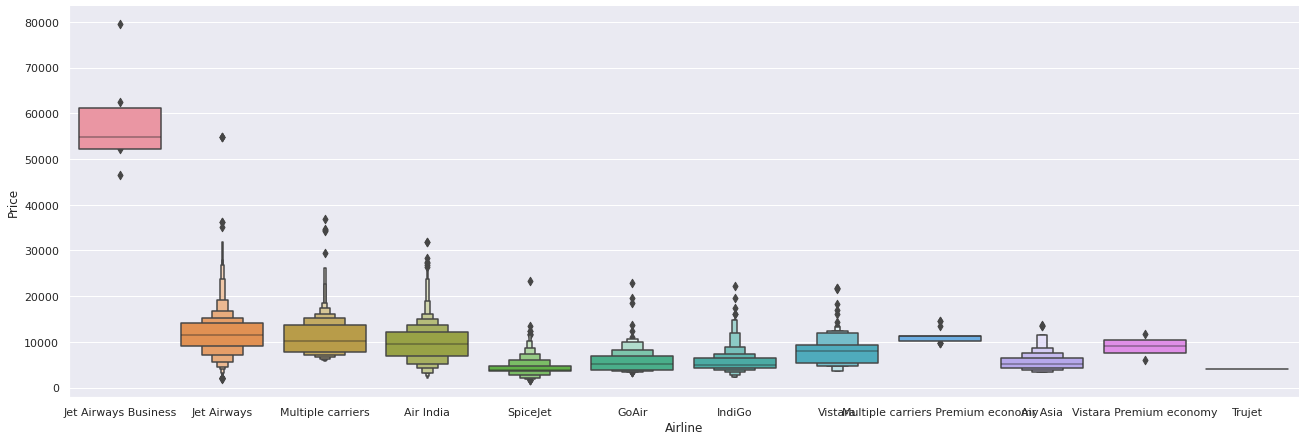

In [ ]:
sns.catplot(y='Price',x='Airline',data=data.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)

In [ ]:
Airline = data[['Airline']]

Airline = pd.get_dummies(Airline, drop_first=True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
#Method 2 for drop_first= True for N - 1 to reduce colinarity
#Airline = data[['Airline']]

#Airline = pd.get_dummies(Airline,prefix='Airline').iloc[:,1: ]

#Airline.head()

In [ ]:
data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

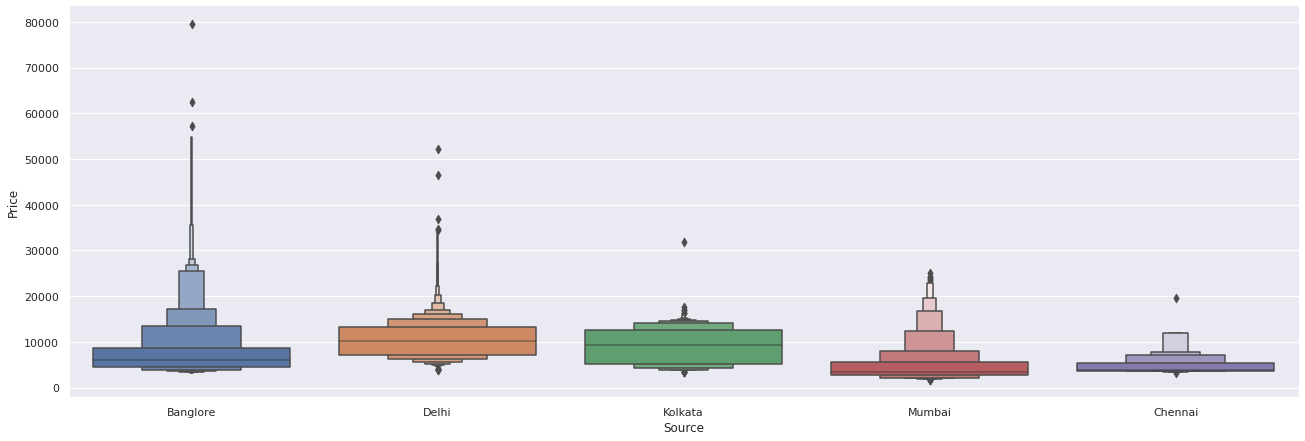

In [ ]:
sns.catplot(y='Price',x='Source',data=data.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)

In [ ]:
# Bangalore has been dropped because it can be represented by the below features N-1 applied to reduce colinarity
source = data[['Source']]

source = pd.get_dummies(source ,prefix='Source', drop_first=True)

source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [ ]:
data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [ ]:
destination = data[['Destination']]

destination = pd.get_dummies(destination ,prefix='Destination', drop_first=True)

destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [ ]:
data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

Route and Total Stop are related to each other. So we can interpret Route using Total_Stop itself. So drop Route and Additional info

In [ ]:
data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [ ]:
data['Total_Stops']

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10682, dtype: object

In [ ]:
data.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [ ]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,2019,16,50,21,35,4,45


In [ ]:
# Since Total_Stops is Ordinal data and not Nominal data because Ordinal data has a set of order. below example starts at 0 and goes up to 4 stops.
data.replace({'non-stop': 0, '1 stop': 1,'2 stops': 2,'3 stops': 3,'4 stops': 4} ,inplace=True)

In [ ]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45


In [ ]:
data = pd.concat([data, Airline, source, destination],axis=1)

In [ ]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
data = data.drop(['Airline','Source','Destination'],axis=1)

In [ ]:
data.head()

,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,2019,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,2019,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,2019,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,2019,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,2019,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
data.shape

(10682, 31)

Test Data EDA

In [ ]:
test_data = pd.read_excel('Test_set.xlsx')

In [ ]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [ ]:
test_data.shape

(2671, 10)

In [ ]:
test_data['Journey_day'] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day

In [ ]:
test_data['Journey_month'] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.month

In [ ]:
test_data['Journey_year'] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.year

In [ ]:
test_data.drop('Date_of_Journey',axis=1,inplace=True)

In [ ]:
test_data['Dep_hour'] = pd.to_datetime(test_data['Dep_Time']).dt.hour

In [ ]:
test_data['Dep_min'] = pd.to_datetime(test_data['Dep_Time']).dt.minute 

In [ ]:
test_data.drop('Dep_Time',axis=1,inplace=True)

In [ ]:
test_data['Arr_hour'] = pd.to_datetime(test_data['Arrival_Time']).dt.hour 

In [ ]:
test_data['Arr_hour'] = pd.to_datetime(test_data['Arrival_Time']).dt.minute

In [ ]:
test_data.drop('Arrival_Time',axis=1,inplace=True)

In [ ]:
duration = list(test_data['Duration'])

for num in range(len(duration)):
    if len(duration[num].split())  !=2:
        if "h" in duration[num]:
            duration[num]= duration[num].strip() + " 0m"
        else:
            duration[num]= "0h " +duration[num]
  
duration_hours=[]
duration_mins=[]

for num in range(len(duration)):
    duration_hours.append(int(duration[num].split(sep="h")[0]))
    duration_mins.append(int(duration[num].split(sep="m")[0].split()[-1]))

In [ ]:
test_data['Duration_hours'] = duration_hours

test_data['Duration_mins'] = duration_mins

In [ ]:
test_data.drop('Duration',axis=1,inplace=True)

In [ ]:
test_data['Airline'].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

In [ ]:
Airline = test_data[['Airline']]

Airline = pd.get_dummies(Airline, drop_first=True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [ ]:
source = test_data['Source']

source = pd.get_dummies(source ,prefix='Source', drop_first=True)

source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [ ]:
destination = test_data['Destination']

destination = pd.get_dummies(destination ,prefix='Source', drop_first=True)

destination.head()

,Source_Cochin,Source_Delhi,Source_Hyderabad,Source_Kolkata,Source_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [ ]:
test_data.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [ ]:
test_data.replace({'non-stop': 0, '1 stop': 1,'2 stops': 2,'3 stops': 3,'4 stops': 4} ,inplace=True)

In [ ]:
test_data = pd.concat([test_data, Airline, source, destination],axis=1)

In [ ]:
test_data.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arr_hour,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Source_Cochin,Source_Delhi,Source_Hyderabad,Source_Kolkata,Source_New Delhi
0,Jet Airways,Delhi,Cochin,1,6,6,2019,17,30,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,IndiGo,Kolkata,Banglore,1,12,5,2019,6,20,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,1,21,5,2019,19,15,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,Multiple carriers,Delhi,Cochin,1,21,5,2019,8,0,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,Air Asia,Banglore,Delhi,0,24,6,2019,23,55,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
test_data = test_data.drop(['Airline','Source','Destination'],axis=1)

In [ ]:
test_data.head()

,Total_Stops,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arr_hour,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Source_Cochin,Source_Delhi,Source_Hyderabad,Source_Kolkata,Source_New Delhi
0,1,6,6,2019,17,30,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,2019,6,20,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,2019,19,15,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,2019,8,0,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,2019,23,55,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
test_data.shape

(2671, 28)

In [ ]:
data.head()

,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,2019,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,2019,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,2019,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,2019,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,2019,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
test_data.head()

,Total_Stops,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arr_hour,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Source_Cochin,Source_Delhi,Source_Hyderabad,Source_Kolkata,Source_New Delhi
0,1,6,6,2019,17,30,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,2019,6,20,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,2019,19,15,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,2019,8,0,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,2019,23,55,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


Feature Selection

1. Heatmap
2. Feature_importance
SelectKBest

In [ ]:
data.shape

(10682, 31)

In [ ]:
test_data.shape

(2671, 28)

In [ ]:
data.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Journey_year',
       'Dep_hour', 'Dep_min', 'Arr_hour', 'Arr_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [ ]:
X = data.loc[:,['Total_Stops', 'Journey_day', 'Journey_month', 'Journey_year',
       'Dep_hour', 'Dep_min', 'Arr_hour', 'Arr_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy','Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata','Destination_New Delhi']]

X.head()

,Total_Stops,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,2019,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,2019,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,2019,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,2019,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,2019,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
y = data.iloc[:, 1]

y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

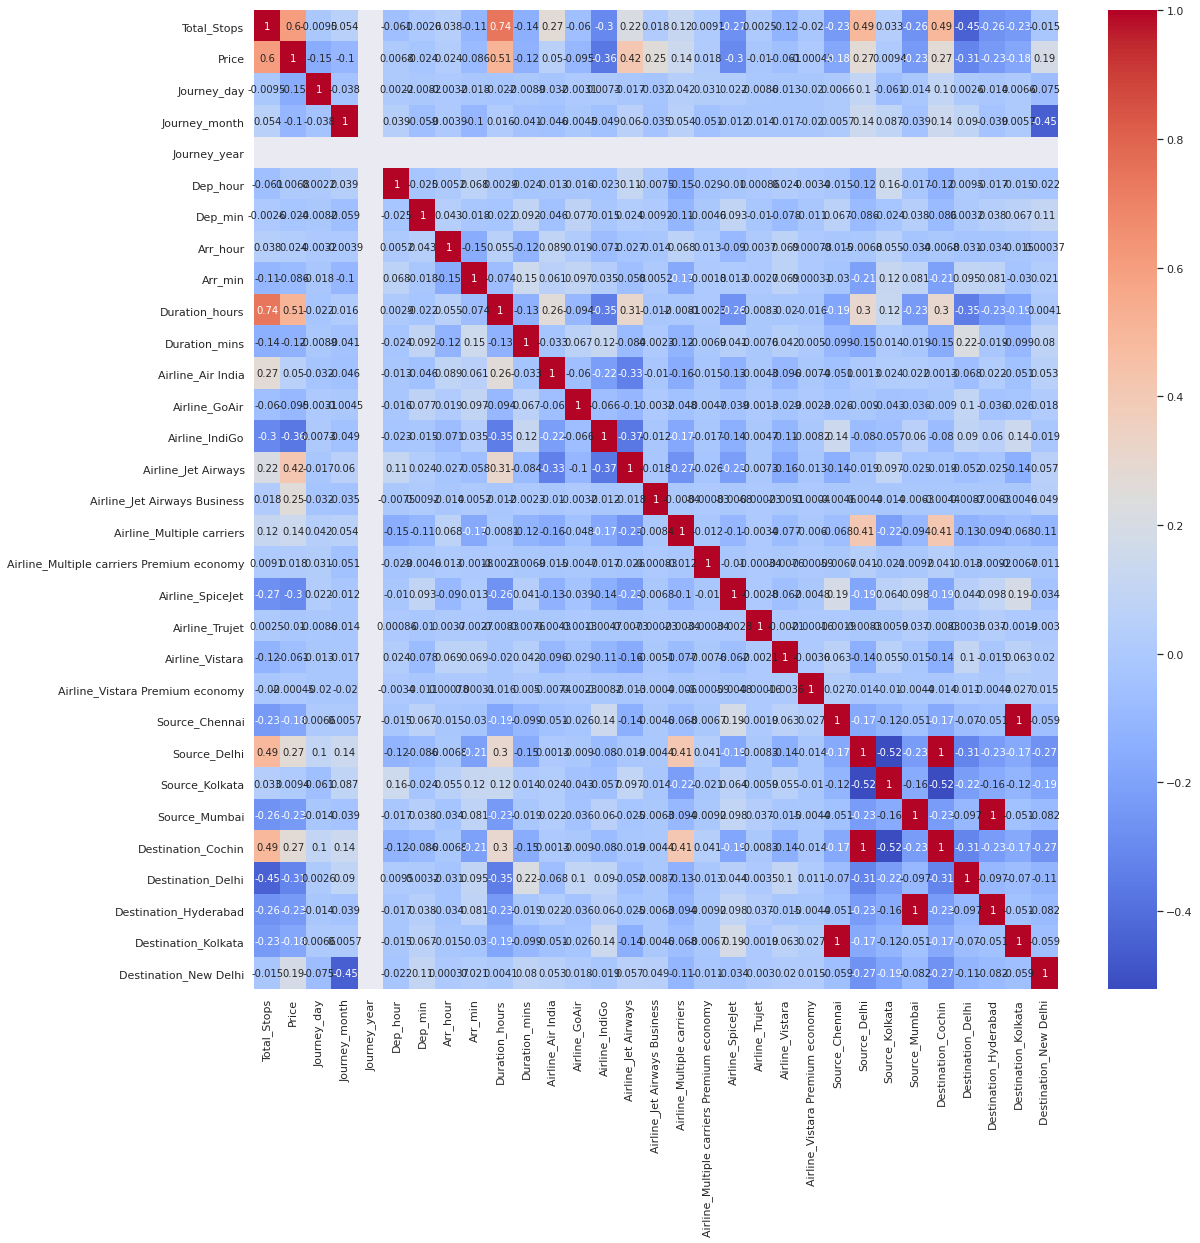

In [ ]:
plt.figure(figsize=(18,18))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

plt.show()

To Find Which Feature is Important we use ExtraTreeRegressor.

In [ ]:
# Find Important Features Using ExtraTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor

Selection = ExtraTreesRegressor()
Selection.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
print(Selection.feature_importances_)

[2.35086546e-01 1.44040065e-01 5.29248899e-02 0.00000000e+00
 2.44071841e-02 2.09841205e-02 2.68196826e-02 1.93479216e-02
 1.23583775e-01 1.75352491e-02 8.59869828e-03 1.98402947e-03
 1.73728570e-02 1.38835923e-01 6.74109542e-02 2.06869732e-02
 8.42841229e-04 3.20098407e-03 1.12109247e-04 4.92460852e-03
 7.24052932e-05 4.55279875e-04 8.59986813e-03 3.17350797e-03
 5.49105336e-03 9.17780449e-03 1.24231944e-02 6.36434437e-03
 5.11614529e-04 2.50315154e-02]


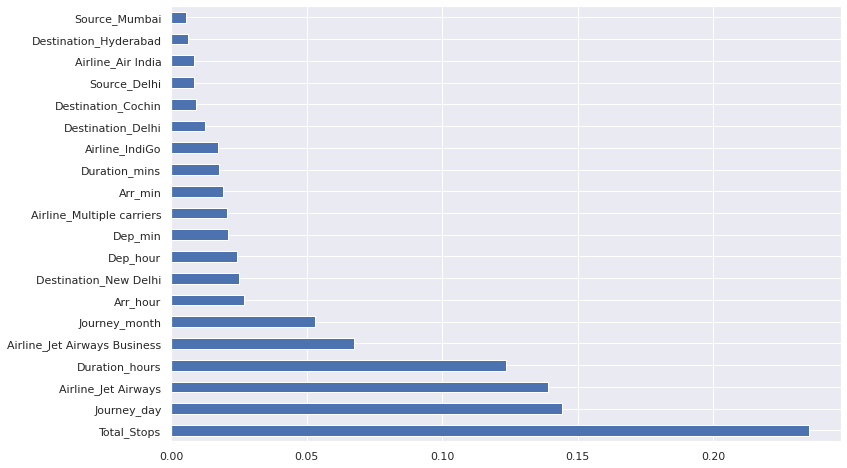

In [ ]:
#plot the graph of for feature importance for better visulization

plt.figure(figsize=(12,8))

feat_importance = pd.Series(Selection.feature_importances_, index=X.columns)

feat_importance.nlargest(20).plot(kind='barh')
plt.show()

Split data into train_test_split 

If needed do Scaling of data 

Scaling is not Done in Random Forest

import model

Fit the data

predict w.r.t X_test

in regression check RSME score

Plot the Graph

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

reg_rf = RandomForestRegressor()

reg_rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred = reg_rf.predict(X_test)

In [ ]:
reg_rf.score(X_train, y_train)

0.9565936764488808

In [ ]:
reg_rf.score(X_test, y_test)

0.8131709879013747

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


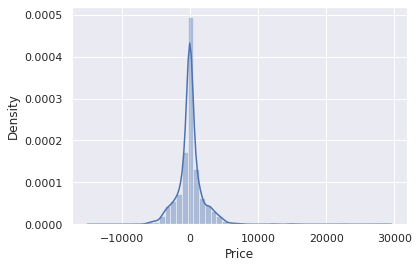

In [ ]:
sns.distplot(y_test-y_pred)
plt.show()

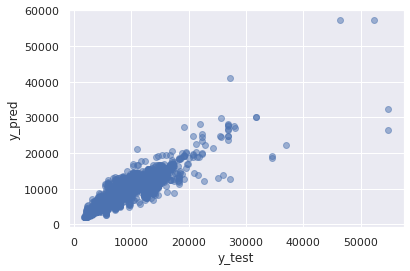

In [ ]:
plt.scatter(y_test,y_pred, alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE', metrics.mean_absolute_error(y_test,y_pred))
print('MSE', metrics.mean_squared_error(y_test,y_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE 1204.4493306994964
MSE 4033632.015768578
RMSE 2008.3904042213949


In [ ]:
metrics.r2_score(y_test,y_pred)

0.8131709879013747

Hyper Parameter Tuning

Method can be tried:

RandomizedSearchCv -- Fast
GridSearchCV

Assign Hyperparameter in form of dictionary

Fit the model
Check the best Performance and best Score

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#n_estimators = [int(X) for X in np.linspace(start=100,stop=1200,num=12)]

#max_features = ['auto', 'sqrt']

#max_depth  = [int(X) for X in np.linspace(5,30,num=6)]

#min_sample_split = [2,5,10,15,100]

#min_sample_leaf = [1,2,5,10]

In [ ]:
random_grid= {'n_estimators':[int(X) for X in np.linspace(start=100,stop=1200,num=12)],
      'max_depth':[int(X) for X in np.linspace(5,30,num=6)],
      'min_samples_split': [2,5,10,15,100],
      'min_samples_leaf' : [1,2,5,10],
      'max_features': ['sqrt','auto'],

}

In [ ]:
rf_random = RandomizedSearchCV(estimator= reg_rf,param_distributions= random_grid,scoring = 'neg_mean_squared_error',n_iter = 10,cv=5,verbose=2, random_state=42,n_jobs=1 )

In [ ]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10, total=  12.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.9s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10, total=  12.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10, total=  12.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10, total=  13.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10, total=  16.9s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=15, total=  21.0s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  8.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rf_random.best_params_

{'max_depth': 15,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 300}

In [ ]:
prediction = rf_random.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


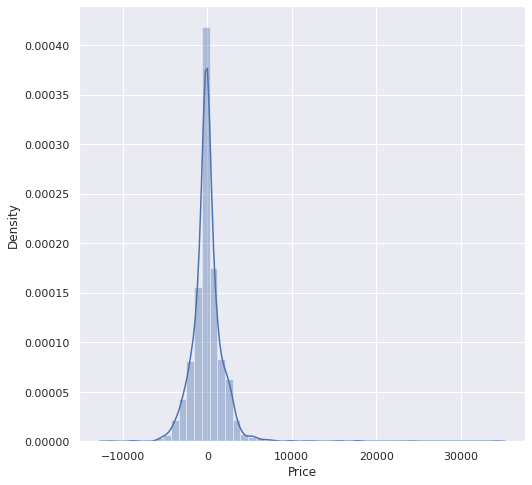

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(y_test-prediction)
plt.show()

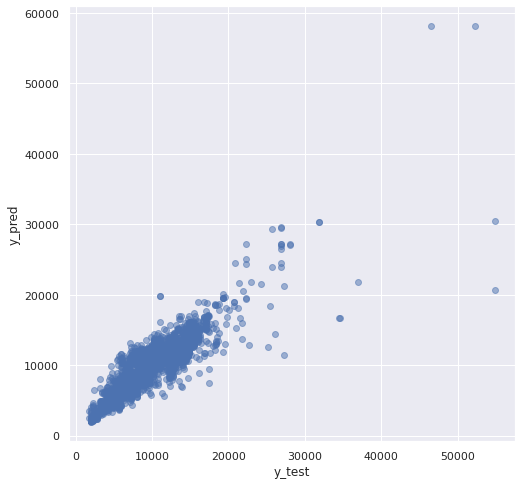

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, prediction, alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [ ]:
print('MAE', metrics.mean_absolute_error(y_test, prediction))
print('MSE', metrics.mean_squared_error(y_test,prediction))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE 1195.6184669722263
MSE 3789434.2589033637
RMSE 1946.6469271296642


Save the Model


In [ ]:
import pickle
file = open('flight_rf.pkl','wb')

#dump information to that file
pickle.dump(rf_random,file)

In [ ]:
model = open('flight_rf.pkl','rb')

forest = pickle.load(model)

In [ ]:
y_prediction = forest.predict(X_test)

In [ ]:
metrics.r2_score(y_test , y_prediction)

0.8244816938590511